In [3]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [4]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [5]:
#9 measure per well

In [6]:
%%time
# DL data
path = input_file_directory + "/mefs/mef_mitotracker/mef_mitotracker_exp2.csv"
df_mito_9measures = pandas.read_csv(path, sep = ";")
#change dot to comma
df_mito_9measures.iloc[:,1:] = df_mito_9measures.iloc[:,1:].apply(lambda x: x.str.replace(',','.'))
df_mito_9measures.set_index('Measure', inplace = True)
#change to numeric
df_mito_9measures = df_mito_9measures.apply(pandas.to_numeric, errors='coerce', axis=1)
df_mito_9measures

Wall time: 74.8 ms


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
Measure,,,,,,,,,,,,,,,,,,,,,
1,36.724,31.839,27.219,33.407,32.869,34.874,24.577,7.186,6.950,7.205,...,32.160,5.114,4.917,32.569,30.473,30.148,34.250,31.941,31.941,30.307
2,24.639,23.455,24.530,24.174,24.528,24.780,23.564,2.031,2.109,2.227,...,22.440,1.980,2.020,23.075,22.220,21.799,23.860,22.642,23.011,22.509
3,17.577,17.060,18.352,17.628,17.934,17.958,17.713,1.474,1.540,1.472,...,17.084,2.086,2.196,17.489,17.116,16.723,18.469,17.645,17.018,18.509
4,36.079,25.714,24.663,27.147,27.007,27.426,22.760,7.265,6.619,6.652,...,26.762,7.125,7.229,30.720,25.273,29.833,31.551,30.625,25.108,29.382
5,22.553,20.290,21.233,20.852,20.903,21.384,19.739,1.998,1.780,1.931,...,22.683,1.765,1.810,22.761,22.264,22.767,24.176,23.930,22.221,24.235
6,16.167,15.998,16.766,16.422,16.768,17.296,16.532,1.416,1.406,1.434,...,18.245,1.378,1.464,17.915,17.913,18.270,19.207,18.654,18.352,19.500
7,38.136,28.799,30.240,29.373,30.686,31.070,29.022,5.180,5.333,5.382,...,32.090,3.734,3.301,37.249,30.975,36.287,40.404,38.464,31.830,38.400
8,23.894,20.070,20.977,20.433,20.970,20.377,20.288,2.234,2.426,2.411,...,27.073,1.782,1.777,27.660,27.573,27.603,29.746,29.524,28.409,29.653
9,15.927,15.357,16.018,15.826,15.952,15.501,15.446,2.318,2.483,2.083,...,19.208,1.849,1.722,18.058,18.548,18.929,20.144,19.905,19.009,20.300


In [7]:
# CONTROL
data = ['E','F','G','H']
df_list = []
condition_media = 'DMEM'

for letter in data:
    #select by letter + the good wells
    df_select = df_mito_9measures.loc[:, df_mito_9measures.columns.str.startswith(letter)]
    df_select = df_select.iloc[:, 0:3]
    df_select.columns = "WT MEF", "ATG7-/-", "ATG7-/- +dox"
    #add mean value and save the data in a list
    df_select.loc[letter] = df_select.mean()
    df_select['condition'] = condition_media
    mean_values = df_select.iloc[9:,:]
    df_list.append(mean_values)

df_control = pandas.concat([df_list[0], df_list[1], df_list[2], df_list[3]], axis=0)
df_control

,WT MEF,ATG7-/-,ATG7-/- +dox,condition
Measure,,,,
E,28.438333,21.526667,22.773889,DMEM
F,26.866222,20.712889,21.593222,DMEM
G,28.497111,21.195556,23.036556,DMEM
H,28.683111,23.757778,24.193889,DMEM


In [9]:
# DMEM + FCCP + DMSO
data = ['A','B','C','D']
df_list = []
condition_media = 'DMSO+FCCP'

for letter in data:
    df_select = df_mito_9measures.loc[:, df_mito_9measures.columns.str.startswith(letter)]
    df_select = df_select.iloc[:, 0:7]
    df_select.columns = "WT MEF", "ATG7-/-", "ATG7-/- +dox", "ATG7(1)", "dVSR(1)", "ATG7(2)", "dVSR(2)"
    df_select.loc[letter] = df_select.mean()
    df_select['condition'] = condition_media
    mean_values = df_select.iloc[9:,:]
    df_list.append(mean_values)

df_dmso = pandas.concat([df_list[0], df_list[1], df_list[2], df_list[3]], axis=0)
df_dmso

,WT MEF,ATG7-/-,ATG7-/- +dox,ATG7(1),dVSR(1),ATG7(2),dVSR(2),condition
Measure,,,,,,,,
A,25.744000,22.064667,22.222000,22.806889,23.068556,23.407333,21.071222,DMSO+FCCP
B,22.802444,18.685111,20.553556,19.391556,21.732444,20.432778,20.994667,DMSO+FCCP
C,27.614333,21.136222,22.018889,22.570889,22.470889,22.136667,22.630222,DMSO+FCCP
D,28.407778,20.597556,22.302000,22.465778,22.348000,22.825111,23.562778,DMSO+FCCP


In [11]:
# DMEM + FCCP + BAF
data = ['E','F','G','H']
df_list = []
condition_media = 'BAF+FCCP'

for letter in data:
    df_select = df_mito_9measures.loc[:, df_mito_9measures.columns.str.startswith(letter)]
    df_select = df_select.iloc[:, 5:]
    df_select.columns = "WT MEF", "ATG7-/-", "ATG7-/- +dox", "ATG7(1)", "dVSR(1)", "ATG7(2)", "dVSR(2)"
    df_select.loc[letter] = df_select.mean()
    df_select['condition'] = condition_media
    mean_values = df_select.iloc[9:,:]
    df_list.append(mean_values)

df_baf = pandas.concat([df_list[0], df_list[1], df_list[2], df_list[3]], axis=0)
df_baf

,WT MEF,ATG7-/-,ATG7-/- +dox,ATG7(1),dVSR(1),ATG7(2),dVSR(2),condition
Measure,,,,,,,,
E,21.744444,21.517778,22.100667,22.379000,22.209000,22.041889,22.321000,BAF+FCCP
F,20.015667,20.889000,20.625000,22.394556,21.971889,20.570556,22.548667,BAF+FCCP
G,22.175889,21.931556,22.717444,22.747556,22.531222,21.797222,22.715222,BAF+FCCP
H,25.277333,23.595000,24.706556,26.867444,25.925556,24.099889,25.866111,BAF+FCCP


In [12]:
#pull the results
df_mitotracker = pandas.concat([df_dmso, df_baf,df_control], axis=0)
df_mitotracker.reset_index(drop=True, inplace=True)
col = df_mitotracker.pop("condition")
df_mitotracker.insert(0, "condition", col)

path = 'ATG7/Mitotracker/'
df_mitotracker.to_csv(output_file_directory+path+'number_mito_exp2.csv', header=True, index=False, sep=',')

df_mitotracker

,condition,WT MEF,ATG7-/-,ATG7-/- +dox,ATG7(1),dVSR(1),ATG7(2),dVSR(2)
0,DMSO+FCCP,25.744000,22.064667,22.222000,22.806889,23.068556,23.407333,21.071222
1,DMSO+FCCP,22.802444,18.685111,20.553556,19.391556,21.732444,20.432778,20.994667
2,DMSO+FCCP,27.614333,21.136222,22.018889,22.570889,22.470889,22.136667,22.630222
3,DMSO+FCCP,28.407778,20.597556,22.302000,22.465778,22.348000,22.825111,23.562778
4,BAF+FCCP,21.744444,21.517778,22.100667,22.379000,22.209000,22.041889,22.321000
5,BAF+FCCP,20.015667,20.889000,20.625000,22.394556,21.971889,20.570556,22.548667
6,BAF+FCCP,22.175889,21.931556,22.717444,22.747556,22.531222,21.797222,22.715222
7,BAF+FCCP,25.277333,23.595000,24.706556,26.867444,25.925556,24.099889,25.866111
8,DMEM,28.438333,21.526667,22.773889,NaN,NaN,NaN,NaN
9,DMEM,26.866222,20.712889,21.593222,NaN,NaN,NaN,NaN


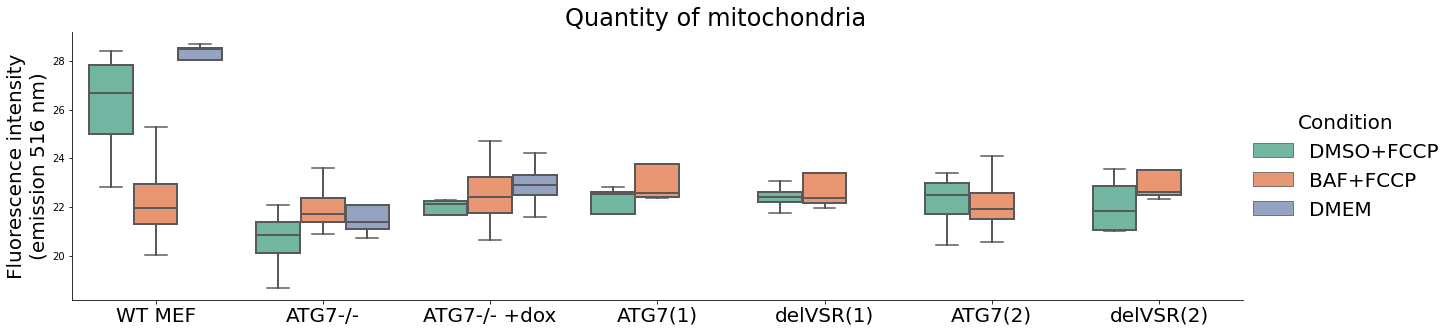

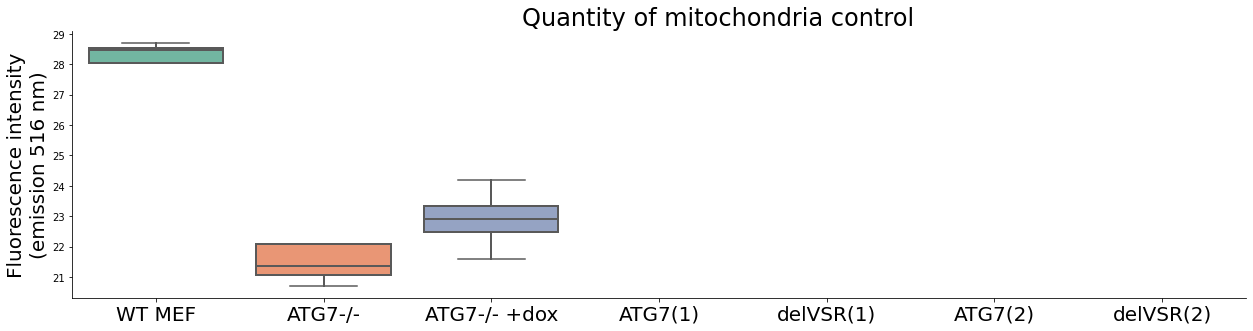

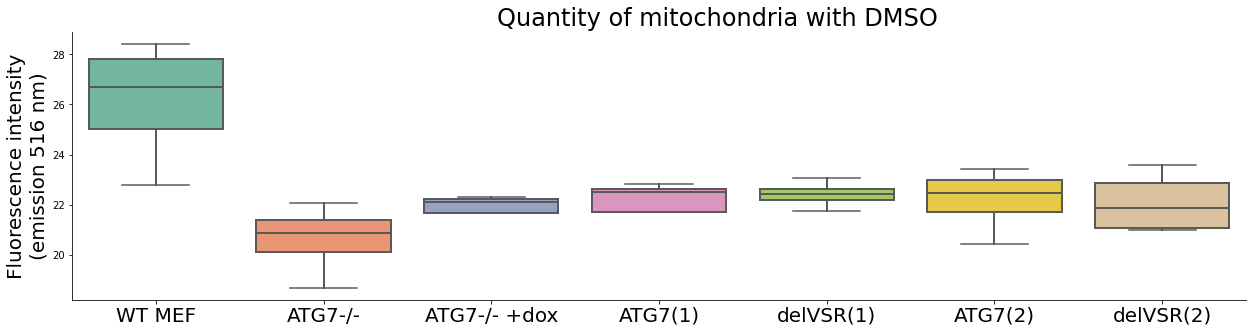

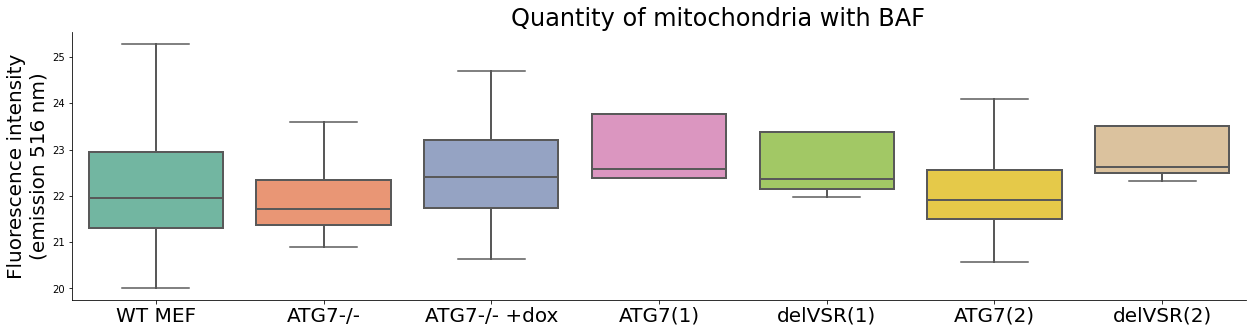

In [17]:
# Distribution: Data preparation + graph
all_data = [[df_mitotracker, 'Quantity of mitochondria', '(emission 516 nm)']]

for data_ in all_data:
    Data = data_[0]
    info = data_[1]
    info_fluo = data_[2]
    
    shape = Data.shape
    shape = shape[0]

    #select the sample type column
    media_condition = {'condition':[Data.iloc[:,0][i]
      for i in range(0, shape)]}

    #convert to df, and copy it 3 times
    media_conditiondf = pandas.DataFrame(media_condition)
    media_conditiondf = pandas.concat([media_conditiondf,media_conditiondf,media_conditiondf,
                                      media_conditiondf,media_conditiondf,media_conditiondf,
                                      media_conditiondf])

    media_conditiondf.reset_index(drop=True, inplace=True)

    # Y for expression value 
    y = {'y':[Data.iloc[:,j][i]
      for j in range(1,8)
        for i in range(0, shape)]}

    #create df with Y 
    data_distrib = pandas.DataFrame(y).astype(float)

    # X for ATG7/iso1/iso2                              
    data_distrib.loc[:shape,'x'] = 'WT MEF'
    data_distrib.loc[shape: shape*2,'x'] = 'ATG7-/-'
    data_distrib.loc[shape*2: shape*3,'x'] = 'ATG7-/- +dox'
    data_distrib.loc[shape*3: shape*4,'x'] = 'ATG7(1)'
    data_distrib.loc[shape*4: shape*5,'x'] = 'delVSR(1)'
    data_distrib.loc[shape*5: shape*6,'x'] = 'ATG7(2)'
    data_distrib.loc[shape*6:,'x'] = 'delVSR(2)'

    # Will be used for Hue
    data_distrib['Condition'] = media_conditiondf['condition']
    
    #graph to see BAF + DMSO in the same graph. Useful to see BAF effect
    seaborn.catplot(x="x", y="y", hue="Condition", aspect = 3.5, kind="box", palette = 'Set2', data = data_distrib, 
                  boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

    plt.ylabel('Fluorescence intensity\n' + info_fluo)
    plt.xlabel('')
    plt.title(info, x=.55)
    print()

    #separation of DMSO and BAF
    df_control = data_distrib[data_distrib['Condition'].str.startswith('DMEM')]
    df_dmso = data_distrib[data_distrib['Condition'].str.startswith('DMSO')]
    df_baf = data_distrib[data_distrib['Condition'].str.startswith('BAF')]
    
    dfs_conditions = [[df_control, ' control'], [df_dmso, ' with DMSO'], [df_baf, ' with BAF']]
    for df_ in dfs_conditions:
        data_drug = df_[0]
        drug_info = df_[1]
    
        #graph with BAF or DMSO treatment separatly to have a better view of the cell lines
        seaborn.catplot(x="x", y="y", aspect = 3.5, kind="box", palette = 'Set2', data = data_drug,
                        boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

        plt.ylabel('Fluorescence intensity\n' + info_fluo)
        plt.xlabel('')
        plt.title(info+drug_info, x=.55)
        print()

# print()


In [10]:
#Distribution: Stats for all 
all_data = [[df_mitotracker, 'amount of mitochondria', '(emission 516 nm)']]

column_name = df_mitotracker.keys()
for data_ in all_data:
    Data = data_[0]
    info = data_[1]
    info_fluo = data_[2]  
    print(info)
    
    #separation of DMSO and BAF
    df_dmso = Data[Data['condition'].str.startswith('DMSO')]
    df_baf = Data[Data['condition'].str.startswith('BAF')]

    dfs_conditions = [[df_dmso, 'with DMSO'], [df_baf, 'with BAF']]
    for df_ in dfs_conditions:
        data_drug = df_[0]
        drug_info = df_[1]
        print(drug_info.upper())
        
        # Mann-Whitney analysis 
        #EV vs WT1
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[3]], data_drug[column_name[4]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[3], "and", column_name[4], drug_info, 'pvalue is', Pvalue)
        
        #EV vs WT1
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[3]], data_drug[column_name[6]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[3], "and", column_name[6], drug_info, 'pvalue is', Pvalue)
        
         #EV vs WT2
        statistic, pvalue = scipy.stats.mannwhitneyu(data_drug[column_name[4]], data_drug[column_name[6]])
        Pvalue = "{:.3E}".format(pvalue)
        print(column_name[4], "and", column_name[6], drug_info, 'pvalue is', Pvalue)
        print()

amount of mitochondria
WITH DMSO
ATG7-/- +dox and ATG7(1) with DMSO pvalue is 1.562E-01
ATG7-/- +dox and ATG7(2) with DMSO pvalue is 3.325E-01
ATG7(1) and ATG7(2) with DMSO pvalue is 3.325E-01

WITH BAF
ATG7-/- +dox and ATG7(1) with BAF pvalue is 2.352E-01
ATG7-/- +dox and ATG7(2) with BAF pvalue is 2.352E-01
ATG7(1) and ATG7(2) with BAF pvalue is 9.697E-02



In [13]:
df2_baf

,condition,WT MEF,ATG7-/-,ATG7-/- +dox,ATG7(1),dVSR(1),ATG7(2),dVSR(2)
4,BAF+FCCP,21.744444,21.517778,22.100667,22.379000,22.209000,22.041889,22.321000
5,BAF+FCCP,20.015667,20.889000,20.625000,22.394556,21.971889,20.570556,22.548667
6,BAF+FCCP,22.175889,21.931556,22.717444,22.747556,22.531222,21.797222,22.715222
7,BAF+FCCP,25.277333,23.595000,24.706556,26.867444,25.925556,24.099889,25.866111
